In [7]:
#Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [11]:
anime_df = pd.read_csv('anime.csv')
rating_df = pd.read_csv('rating.csv')

In [12]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [13]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [14]:
anime_df.tail()

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [15]:
rating_df.tail()

,user_id,anime_id,rating
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9
7813736,73516,8074,9


In [16]:
anime_df.dropna(inplace=True)

In [17]:
rating_df.replace(-1, np.nan, inplace=True)

In [18]:
print(anime_df.describe())

           anime_id        rating       members
count  12017.000000  12017.000000  1.201700e+04
mean   13638.001165      6.478264  1.834888e+04
std    11231.076675      1.023857  5.537250e+04
min        1.000000      1.670000  1.200000e+01
25%     3391.000000      5.890000  2.250000e+02
50%     9959.000000      6.570000  1.552000e+03
75%    23729.000000      7.180000  9.588000e+03
max    34519.000000     10.000000  1.013917e+06


In [19]:
print(rating_df.describe())

            user_id      anime_id        rating
count  7.813737e+06  7.813737e+06  6.337241e+06
mean   3.672796e+04  8.909072e+03  7.808497e+00
std    2.099795e+04  8.883950e+03  1.572496e+00
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    1.897400e+04  1.240000e+03  7.000000e+00
50%    3.679100e+04  6.213000e+03  8.000000e+00
75%    5.475700e+04  1.409300e+04  9.000000e+00
max    7.351600e+04  3.451900e+04  1.000000e+01


In [20]:
average_ratings = anime_df['rating'].to_numpy()

In [21]:
print("Average rating:", np.mean(average_ratings))

Average rating: 6.478264125821752


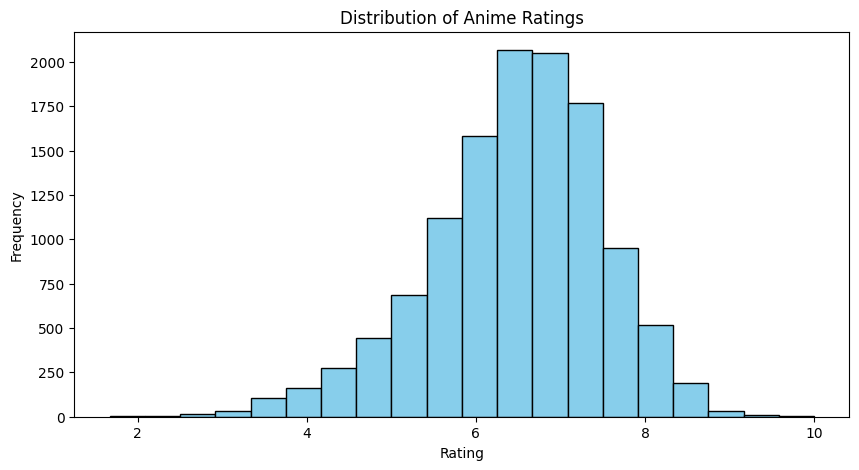

In [22]:
plt.figure(figsize=(10, 5))
plt.hist(anime_df['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

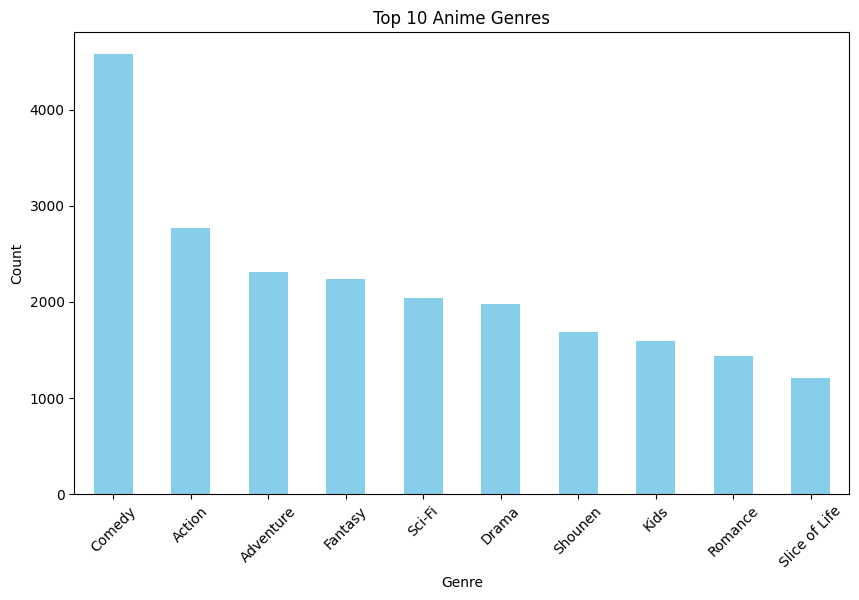

In [24]:
#Genre Distribution:

genre_counts = anime_df['genre'].str.split(', ').explode().value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Anime Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

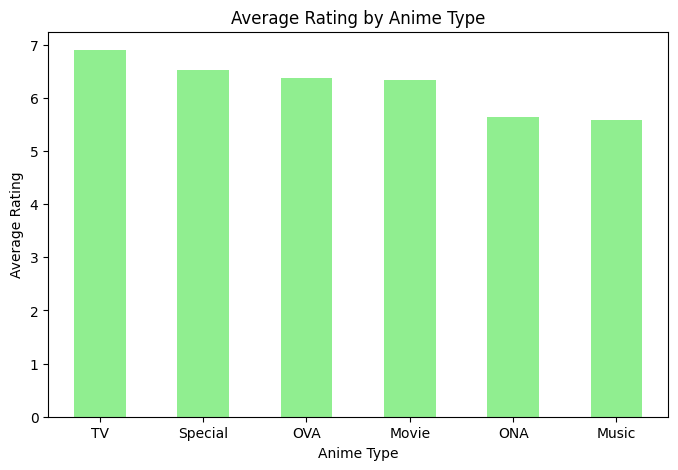

In [25]:
#Average Rating by Anime Type:

avg_rating_by_type = anime_df.groupby('type')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
avg_rating_by_type.plot(kind='bar', color='lightgreen')
plt.title('Average Rating by Anime Type')
plt.xlabel('Anime Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

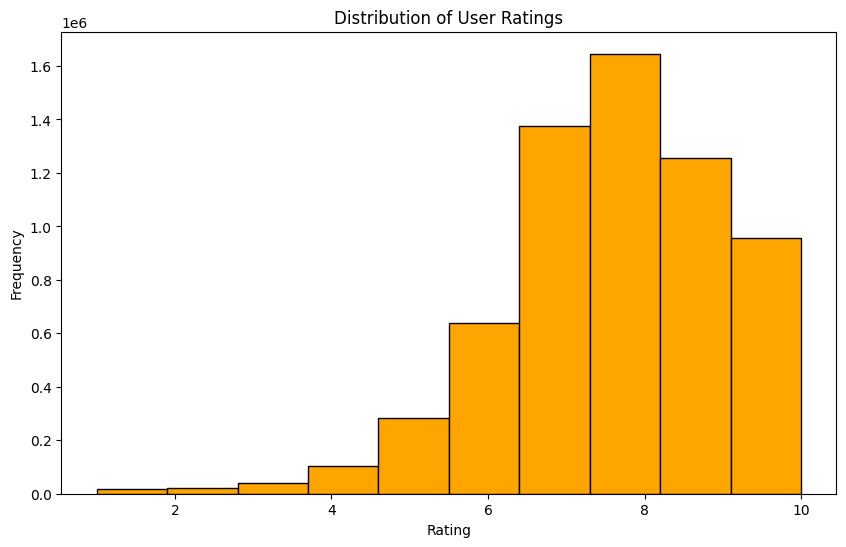

In [26]:
#User Ratings Distribution:

plt.figure(figsize=(10, 6))
plt.hist(rating_df['rating'].dropna(), bins=10, color='orange', edgecolor='black')
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

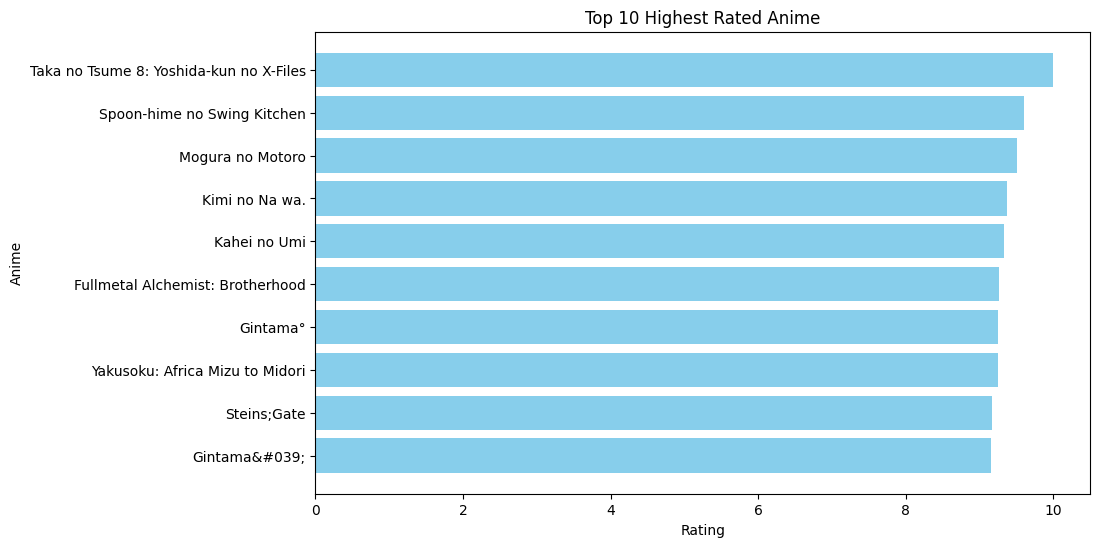

In [27]:
#Top Rated Anime:

top_rated_anime = anime_df.nlargest(10, 'rating')[['name', 'rating']]
plt.figure(figsize=(10, 6))
plt.barh(top_rated_anime['name'], top_rated_anime['rating'], color='skyblue')
plt.title('Top 10 Highest Rated Anime')
plt.xlabel('Rating')
plt.ylabel('Anime')
plt.gca().invert_yaxis()
plt.show()